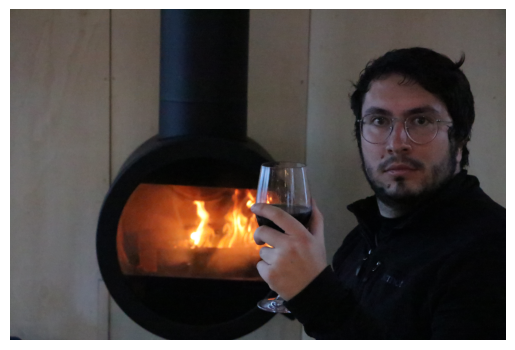

In [42]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load an image from the 'images' folder
image_path = os.path.join('images', 'fire.jpg')

# Read the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# remove the mean
image = image - np.mean(image)

colored_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
colored_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB)

# Display the image colored
plt.imshow(colored_image)
plt.axis('off')
plt.show()

In [43]:
def get_blur_score_patch(patch):
    # apply dft to grad
    ftt = np.fft.fft2(patch)
    #ftt = np.fft.fftshift(ftt)

    magnitude_spectrum = np.abs(ftt)

    # set dc component to 0
    magnitude_spectrum[0, 0] = 0

    c = 100
    magnitude_spectrum = np.abs(magnitude_spectrum) / (np.abs(magnitude_spectrum) + c)

    mean = np.mean(magnitude_spectrum) 

    return mean

def get_grad_image(image):
    # Assuming the image is already in grayscale
    # Calculate the gradient in x and y direction
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5) 

    # Combine the two gradients
    return cv2.magnitude(grad_x, grad_y)

def get_blur_heatmap(image):
    # divide the image in patch of 64x64

    rows, cols = image.shape
    patch_size = 64
    
    scores = np.zeros((rows // patch_size, cols // patch_size))

    for i in range(rows // patch_size):
        for j in range(cols // patch_size):
            patch = image[i * patch_size : (i + 1) * patch_size, j * patch_size : (j + 1) * patch_size]
            score = get_blur_score_patch(patch)
            scores[i, j] = score

    return scores

def calculate_blur_score(heatmap):
    scores = heatmap.flatten()
    # keep only the scores above the median
    median = np.mean(scores)
    scores = [score for score in scores if score > median]
    return np.mean(scores)
    

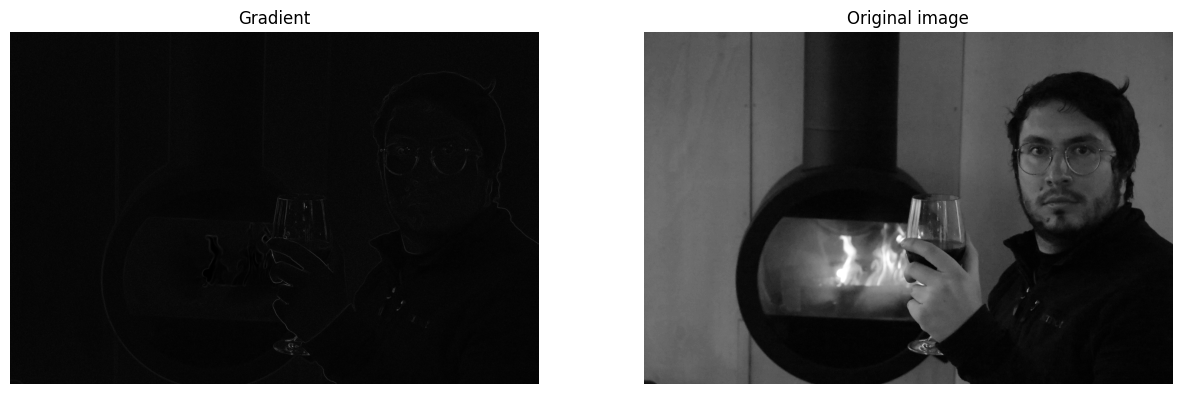

In [50]:
# Combine the two gradients
grad = get_grad_image(image)

# Display the gradient
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(grad, cmap='gray')
plt.title('Gradient')
plt.axis('off')
plt.subplot(122)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.show()

In [51]:
heatmap_grad = get_blur_heatmap(grad)
heatmap_grad_resized = cv2.resize(heatmap_grad, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_CUBIC)

heatmap = get_blur_heatmap(image)
heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_CUBIC)

# flatten scores
scores = heatmap.flatten()
scores_grad = heatmap_grad.flatten()

# keep only the scores above the median
median = np.mean(scores)
median_grad = np.mean(scores_grad)
scores = [score for score in scores if score > median]
scores_grad = [score for score in scores_grad if score > median_grad]

# calculate the mean of the scores
blur_score = np.mean(scores)
blur_score_grad = np.mean(scores_grad)
print('Blur score: ', blur_score)
print('Blur score grad: ', blur_score_grad)


Blur score:  0.5742995232928533
Blur score grad:  0.9686875796088267


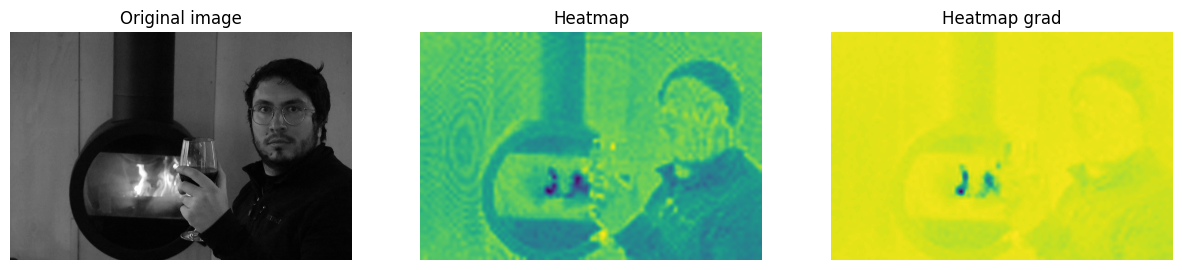

In [54]:
# plot the heatmaps
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(132)
plt.imshow(heatmap_resized,)
plt.title('Heatmap')
plt.axis('off')
plt.subplot(133)
plt.imshow(heatmap_grad_resized,)
plt.title('Heatmap grad')
plt.axis('off')
plt.show()

In [55]:
from tqdm import tqdm

def get_blurred_imgs(image, blurs = [3, 5, 10, 50, 100, 200]):
    # create 5 images with different blur
    tortn = [ image ]
    tortn.extend([ cv2.blur(image, (i, i)) for i in blurs])
    return tortn, blurs

def plot_blurred_imgs(imgs, blurs):
    # plot the images
    plt.figure(figsize=(15, 8))
    for i, val in  enumerate(blurs):
        plt.subplot(2, 3, i + 1)
        plt.imshow(imgs[i + 1], cmap='gray')
        # remowe the axis
        plt.axis('off')
        plt.title(f'Blur: ({val}, {val})')

In [56]:
# load the image
full_car_path = os.path.join('images', 'full_car.jpg')

# create
car = cv2.imread(full_car_path, cv2.IMREAD_GRAYSCALE)

car_blurred, blurs = get_blurred_imgs(car)
grad_car_blurred = [get_grad_image(img) for img in car_blurred]

# plot_blurred_imgs(car_blurred, blurs)

blur_scores_car = [calculate_blur_score(get_blur_heatmap(car_blurred[i])) for i in tqdm(range(len(car_blurred)))]
blur_scores_car_grad = [calculate_blur_score(get_blur_heatmap(grad_car_blurred[i])) for i in tqdm(range(len(grad_car_blurred)))]

100%|██████████| 7/7 [00:02<00:00,  2.57it/s]


In [176]:
tractor_path = os.path.join('images', 'tractor.jpg')
tractor = cv2.imread(tractor_path, cv2.IMREAD_GRAYSCALE)

tractor_blurred, blurs = get_blurred_imgs(tractor)
grad_tractor_blurred = [get_grad_image(img) for img in tractor_blurred]

# plot_blurred_imgs(tractor_blurred, blurs)

blur_scores_tractor = [calculate_blur_score(get_blur_heatmap(tractor_blurred[i])) for i in tqdm(range(len(tractor_blurred)))]
blur_scores_tractor_grad = [calculate_blur_score(get_blur_heatmap(grad_tractor_blurred[i])) for i in tqdm(range(len(grad_tractor_blurred)))]

100%|██████████| 7/7 [00:02<00:00,  2.77it/s]


In [177]:
cat_path = os.path.join('images', 'cat.jpg')
cat = cv2.imread(cat_path, cv2.IMREAD_GRAYSCALE)

cat_blurred, blurs = get_blurred_imgs(cat)
grad_cat_blurred = [get_grad_image(img) for img in cat_blurred]

# plot_blurred_imgs(cat_blurred, blurs)

blur_scores_cat = [calculate_blur_score(get_blur_heatmap(cat_blurred[i])) for i in tqdm(range(len(cat_blurred)))]
blur_scores_cat_grad = [calculate_blur_score(get_blur_heatmap(grad_cat_blurred[i])) for i in tqdm(range(len(grad_cat_blurred)))]

100%|██████████| 7/7 [00:02<00:00,  2.54it/s]


In [178]:
f1_path = os.path.join('images', 'f1.jpg')
f1 = cv2.imread(f1_path, cv2.IMREAD_GRAYSCALE)

f1_blurred, blurs = get_blurred_imgs(f1)
grad_f1_blurred = [get_grad_image(img) for img in f1_blurred]

# plot_blurred_imgs(f1_blurred, blurs)

blur_scores_f1 = [calculate_blur_score(get_blur_heatmap(f1_blurred[i])) for i in tqdm(range(len(f1_blurred)))]
blur_scores_f1_grad = [calculate_blur_score(get_blur_heatmap(grad_f1_blurred[i])) for i in tqdm(range(len(grad_f1_blurred)))]

100%|██████████| 7/7 [00:01<00:00,  5.77it/s]


In [179]:
harbor_path = os.path.join('images', 'harbor.jpg')
harbor = cv2.imread(harbor_path, cv2.IMREAD_GRAYSCALE)

harbor_blurred, blurs = get_blurred_imgs(harbor)
grad_harbor_blurred = [get_grad_image(img) for img in harbor_blurred]

# plot_blurred_imgs(harbor_blurred, blurs)

blur_scores_harbor = [calculate_blur_score(get_blur_heatmap(harbor_blurred[i])) for i in tqdm(range(len(harbor_blurred)))]
blur_scores_harbor_grad = [calculate_blur_score(get_blur_heatmap(grad_harbor_blurred[i])) for i in tqdm(range(len(grad_harbor_blurred)))]

100%|██████████| 7/7 [00:02<00:00,  2.77it/s]


In [180]:
field_path = os.path.join('images', 'field.jpg') 
field = cv2.imread(field_path, cv2.IMREAD_GRAYSCALE)

field_blurred, blurs = get_blurred_imgs(field)
grad_field_blurred = [get_grad_image(img) for img in field_blurred]

# plot_blurred_imgs(field_blurred, blurs)

blur_scores_field = [calculate_blur_score(get_blur_heatmap(field_blurred[i])) for i in tqdm(range(len(field_blurred)))]
blur_scores_field_grad = [calculate_blur_score(get_blur_heatmap(grad_field_blurred[i])) for i in tqdm(range(len(grad_field_blurred)))]

100%|██████████| 7/7 [00:02<00:00,  2.63it/s]


In [181]:
tunnel_path = os.path.join('images', 'tunnel.jpg')
tunnel = cv2.imread(tunnel_path, cv2.IMREAD_GRAYSCALE)

tunnel_blurred, blurs = get_blurred_imgs(tunnel)
grad_tunnel_blurred = [get_grad_image(img) for img in tunnel_blurred]

# plot_blurred_imgs(tunnel_blurred, blurs)

blur_scores_tunnel = [calculate_blur_score(get_blur_heatmap(tunnel_blurred[i])) for i in tqdm(range(len(tunnel_blurred)))]
blur_scores_tunnel_grad = [calculate_blur_score(get_blur_heatmap(grad_tunnel_blurred[i])) for i in tqdm(range(len(grad_tunnel_blurred)))]

100%|██████████| 7/7 [00:02<00:00,  2.69it/s]


In [182]:
preikestolen_path = os.path.join('images', 'preikestolen.jpg')
preikestolen = cv2.imread(preikestolen_path, cv2.IMREAD_GRAYSCALE)

preikestolen_blurred, blurs = get_blurred_imgs(preikestolen)
grad_preikestolen_blurred = [get_grad_image(img) for img in preikestolen_blurred]

# plot_blurred_imgs(preikestolen_blurred, blurs)

blur_scores_preikestolen = [calculate_blur_score(get_blur_heatmap(preikestolen_blurred[i])) for i in tqdm(range(len(preikestolen_blurred)))]
blur_scores_preikestolen_grad = [calculate_blur_score(get_blur_heatmap(grad_preikestolen_blurred[i])) for i in tqdm(range(len(grad_preikestolen_blurred)))]

100%|██████████| 7/7 [00:02<00:00,  2.58it/s]


In [183]:
pappol_path = os.path.join('images', 'pappol.jpg')
pappol = cv2.imread(pappol_path, cv2.IMREAD_GRAYSCALE)

pappol_blurred, blurs = get_blurred_imgs(pappol)

grad_pappol_blurred = [get_grad_image(img) for img in pappol_blurred]

# plot_blurred_imgs(pappol_blurred, blurs)

blur_scores_pappol = [calculate_blur_score(get_blur_heatmap(pappol_blurred[i])) for i in tqdm(range(len(pappol_blurred)))]
blur_scores_pappol_grad = [calculate_blur_score(get_blur_heatmap(grad_pappol_blurred[i])) for i in tqdm(range(len(grad_pappol_blurred)))]

100%|██████████| 7/7 [00:02<00:00,  2.80it/s]


In [184]:
fire_path = os.path.join('images', 'fire.jpg')
fire = cv2.imread(fire_path, cv2.IMREAD_GRAYSCALE)

fire_blurred, blurs = get_blurred_imgs(fire)

grad_fire_blurred = [get_grad_image(img) for img in fire_blurred]

# plot_blurred_imgs(fire_blurred, blurs)

blur_scores_fire = [calculate_blur_score(get_blur_heatmap(fire_blurred[i])) for i in tqdm(range(len(fire_blurred)))]
blur_scores_fire_grad = [calculate_blur_score(get_blur_heatmap(grad_fire_blurred[i])) for i in tqdm(range(len(grad_fire_blurred)))]

100%|██████████| 7/7 [00:02<00:00,  2.59it/s]


In [185]:
drone_path = os.path.join('images', 'drone.jpg')
drone = cv2.imread(drone_path, cv2.IMREAD_GRAYSCALE)

drone_blurred, blurs = get_blurred_imgs(drone)

grad_drone_blurred = [get_grad_image(img) for img in drone_blurred]

# plot_blurred_imgs(drone_blurred, blurs)

blur_scores_drone = [calculate_blur_score(get_blur_heatmap(drone_blurred[i])) for i in tqdm(range(len(drone_blurred)))]
blur_scores_drone_grad = [calculate_blur_score(get_blur_heatmap(grad_drone_blurred[i])) for i in tqdm(range(len(grad_drone_blurred)))]

100%|██████████| 7/7 [00:01<00:00,  6.79it/s]


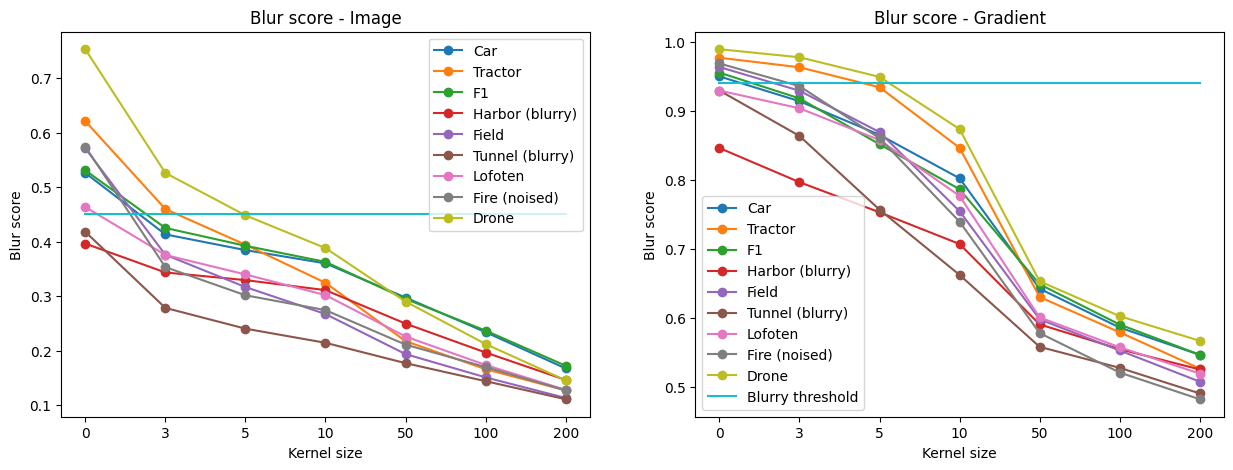

In [188]:
# plot the blur scores
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(blur_scores_car, label='Car', marker='o')
plt.plot(blur_scores_tractor, label='Tractor', marker='o')
plt.plot(blur_scores_f1, label='F1', marker='o')
plt.plot(blur_scores_harbor, label='Harbor (blurry)', marker='o')
plt.plot(blur_scores_field, label='Field', marker='o')
plt.plot(blur_scores_tunnel, label='Tunnel (blurry)', marker='o')
# plt.plot(blur_scores_preikestolen, label='Preikestolen', marker='o')
plt.plot(blur_scores_pappol, label='Lofoten', marker='o')
plt.plot(blur_scores_fire, label='Fire (noised)', marker='o')
plt.plot(blur_scores_drone, label='Drone', marker='o')
plt.xlabel('Kernel size')
plt.ylabel('Blur score')
plt.legend()
plt.xticks(range(len(blurs) +1), [0] + blurs)
plt.plot([0, len(blurs)], [0.45, 0.45], label='Blurry threshold')
plt.title('Blur score - Image')
plt.subplot(122)
plt.plot(blur_scores_car_grad, label='Car', marker='o')
plt.plot(blur_scores_tractor_grad, label='Tractor', marker='o')
plt.plot(blur_scores_f1_grad, label='F1', marker='o')
plt.plot(blur_scores_harbor_grad, label='Harbor (blurry)', marker='o')
plt.plot(blur_scores_field_grad, label='Field', marker='o')
plt.plot(blur_scores_tunnel_grad, label='Tunnel (blurry)', marker='o')
# plt.plot(blur_scores_preikestolen_grad, label='Preikestolen (blurry)', marker='o')
plt.plot(blur_scores_pappol_grad, label='Lofoten', marker='o')
plt.plot(blur_scores_fire_grad, label='Fire (noised)', marker='o')
plt.plot(blur_scores_drone_grad, label='Drone', marker='o')
plt.xticks(range(len(blurs) +1), [0] + blurs)
plt.plot([0, len(blurs)], [0.94, 0.94], label='Blurry threshold')
plt.xlabel('Kernel size')
plt.ylabel('Blur score')
# add a line at 0.95
plt.title('Blur score - Gradient')
plt.legend()
plt.show()

[]

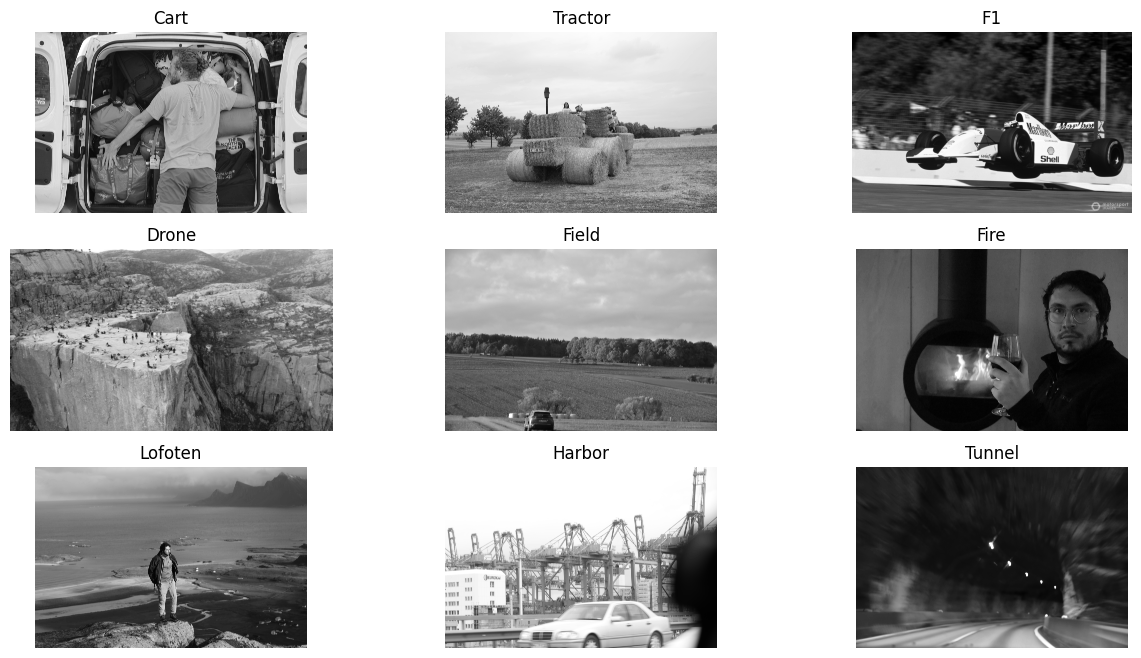

In [187]:
# plot every image

plt.figure(figsize=(15, 8))
plt.subplot(331)
plt.imshow(car, cmap='gray')
plt.title('Cart')
plt.axis('off')
plt.subplot(332)
plt.imshow(tractor, cmap='gray')
plt.title('Tractor')
plt.axis('off')
plt.subplot(333)
plt.imshow(f1, cmap='gray')
plt.title('F1')
plt.axis('off')
plt.subplot(334)
plt.imshow(drone, cmap='gray')
plt.title('Drone')
plt.axis('off')
plt.subplot(335)
plt.imshow(field, cmap='gray')
plt.title('Field')
plt.axis('off')
plt.subplot(336)
plt.imshow(fire, cmap='gray')
plt.title('Fire')
plt.axis('off')
plt.subplot(337)
plt.imshow(pappol, cmap='gray')
plt.title('Lofoten')
plt.axis('off')
plt.subplot(338)
plt.imshow(harbor, cmap='gray')
plt.title('Harbor')
plt.axis('off')
plt.subplot(339)
plt.imshow(tunnel, cmap='gray')
plt.title('Tunnel')
plt.axis('off')

plt.plot()


In [206]:
print('Blur scores:')
print('Car: ', blur_scores_car[0])
print('Tractor: ', blur_scores_tractor[0])
print('F1: ', blur_scores_f1[0])
print('Drone: ', blur_scores_drone[0])
print('Field: ', blur_scores_field[0])
print('Fire: ', blur_scores_fire[0])
print('Lofoten: ', blur_scores_pappol[0])
print('Harbor: ', blur_scores_harbor[0])
print('Tunnel: ', blur_scores_tunnel[0])

print('Blur scores grad:')
print('Car: ', blur_scores_car_grad[0])
print('Tractor: ', blur_scores_tractor_grad[0])
print('F1: ', blur_scores_f1_grad[0])
print('Drone: ', blur_scores_drone_grad[0])
print('Field: ', blur_scores_field_grad[0])
print('Fire: ', blur_scores_fire_grad[0])
print('Lofoten: ', blur_scores_pappol_grad[0])
print('Harbor: ', blur_scores_harbor_grad[0])
print('Tunnel: ', blur_scores_tunnel_grad[0])



Blur scores:
Car:  0.5260448053319986
Tractor:  0.6212077406314326
F1:  0.5307963251584531
Drone:  0.7532072426022907
Field:  0.5712756690852443
Fire:  0.5742995232928533
Lofoten:  0.4635211955045428
Harbor:  0.396349838758989
Tunnel:  0.41801173775166467
Blur scores grad:
Car:  0.9498938846091014
Tractor:  0.977010979132646
F1:  0.9554037801380714
Drone:  0.9893037333927828
Field:  0.9635071881175805
Fire:  0.9686875796088267
Lofoten:  0.9293886722869232
Harbor:  0.8460779796053143
Tunnel:  0.9294337185530278
